In [ ]:
%pip install qutip #En Colab debe instalar el paquete cada vez que reinicie el entorno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 28.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt #Para construir los gráficos
import numpy as np #Para calculos avanzados con arreglos
import qutip as qtp #Para usar el modulo qutip

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(



#**Initial state and Time-evolution**

$\large 2)$ Consider the Hamiltonian,
$$
\hat{H}=\hat{\sigma}_z+\Gamma\hat{\sigma}_x:=
  \begin{pmatrix}
    1 & \Gamma \\ \Gamma & -1
  \end{pmatrix}
$$
If we start the dynamics from the up-spin state $\psi(t=0)=\begin{pmatrix}1 \\ 0\end{pmatrix}$
the spin precesses around the axis of the magnetic field $\vec{B}=(\Gamma,0,1)$ with the period $T=\frac{\pi}{\sqrt{1+\Gamma^2}}$


(a) Calculate the dynamics exactly. Diagonalize the Hamiltonian and use its eigenbasis to solve the problem

(b) Use the Suzuki-Trotter approximant for the time-evolution operator,
$$
\hat{U}(t+\Delta t;t)\approx e^{-i\Delta t \hat{\sigma}_z}e^{-i\Delta t\Gamma\hat{\sigma}_x}
$$

In [ ]:
#Parameters definition

n=200000
t=20
delta_t= t/n
Gamma=0.75

psi_ST = qtp.basis(2,0)
psi_P = qtp.basis(2,0)

#Hamiltonian definition

H0 = qtp.sigmaz()
H1 = Gamma*qtp.sigmax()
H = H0+H1


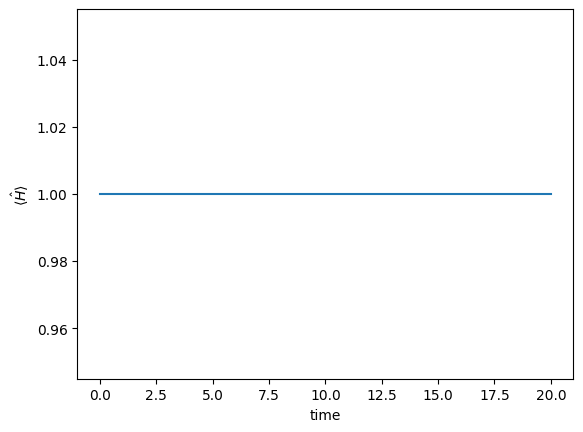

In [ ]:
#Exact solution

Energies_E=[1]*1000
t1=np.linspace(0, 20, 1000)

plt.figure()
plt.plot(t1,Energies_E)
plt.xlabel(r'time')
plt.ylabel(r'$\langle \hat{H} \rangle$')
plt.show()

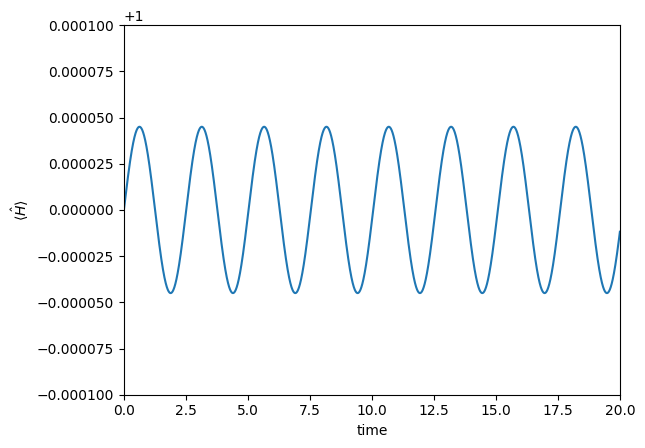

In [ ]:
#Susuki-Trotter approximant

t2=np.linspace(0,20,n)
Energies_ST = [0]*n

for i in range(n):
  psi_ST=(-1j*delta_t*H0).expm()*(-1j*delta_t*H1).expm()*psi_ST
  Energies_ST[i]=qtp.expect(H,psi_ST)

plt.figure()
plt.plot(t2,Energies_ST)
plt.xlim(0,20)
plt.ylim(0.9999,1.0001)
plt.xlabel(r'time')
plt.ylabel(r'$\langle \hat{H} \rangle$')
plt.show()


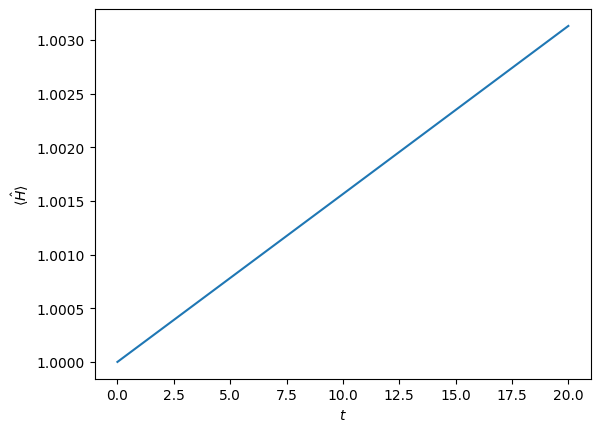

In [ ]:
#Perturbational approximant

Energies_P = [0]*n
t3=np.linspace(0,20,n)

for i in range(n):
  psi_P= (qtp.qeye(2)-1j*delta_t*H)*psi_P
  Energies_P[i]=qtp.expect(H,psi_P)

plt.figure()
plt.plot(t3,Energies_P)
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle \hat{H} \rangle$')
plt.show()

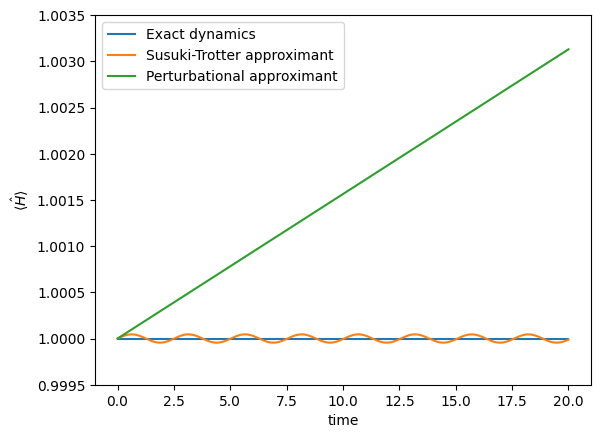

In [ ]:
#Comparison

plt.figure()
plt.plot(t1,Energies_E,t2,Energies_ST,t3,Energies_P)
plt.xlabel(r'time')
plt.ylim(0.9995,1.0035)
plt.ylabel(r'$\langle \hat{H} \rangle$')
plt.legend(['Exact dynamics', 'Susuki-Trotter approximant', 'Perturbational approximant'])
plt.show()

$\large 3)$ Consider the chaotic dynamics of the system

$$
K(\vec{p})=\frac{1}{2}\left(\vec{p}_1^2+\vec{p}_2^2\right) \hspace{0.25cm}\text {and} \hspace{0.25cm} V(\vec{q})=\frac{1}{2}q_1^2q_2^2
$$

Show in coordinate space $(q_1, q_2)$ that the system is confined in the area surrounded by four hyperbolas given by $|q_1q_2|=constant$ (consider the constant to be 2). Plot the movement of the system in the $(q_1, q_2)$ space with the initial conditions: $p_1 = p_2 = 0$, $q_1 = 2$ and $q_2 = 1$ with the energy $E = 2$. Calculate the energy as a function of time using the Trotter approximation and the perturbational approximant and make the respective plots.
Guide yourself on the paper we had been working in the Lecture: Finding Exponential Product Formulas of Higher Orders, Naomichi Hatano and Masuo Suzuki

In [ ]:
#Parameters definition
t=1000
n=10000000
dt=t/n
time= np.linspace(0,t,n)

#vectors and initial conditions
q1=[0]*n
q1[0]=2

q2=[0]*n
q2[0]=1

p1=[0]*n
p1[0]=0

p2=[0]*n
p2[0]=0

V=[0]*n
K=[0]*n

dV1=[0]*n
dV2=[0]*n
dK1=[0]*n
dK2=[0]*n

E=[0]*n

In [ ]:
#Trotter decomposition.

for i in range(n-1):

  K[i]=0.5*(p1[i]**2+p2[i]**2)
  V[i]=0.5*q1[i]**2*q2[i]**2

  E[i]=K[i]+V[i]

  dV1[i]=q1[i]*q2[i]**2
  dV2[i]=q1[i]**2*q2[i]

  p1[i+1]=p1[i]-dt*dV1[i]
  p2[i+1]=p2[i]-dt*dV2[i]

  dK1[i]=p1[i+1]
  dK2[i]=p2[i+1]

  q1[i+1]=q1[i]+dt*dK1[i]
  q2[i+1]=q2[i]+dt*dK2[i]


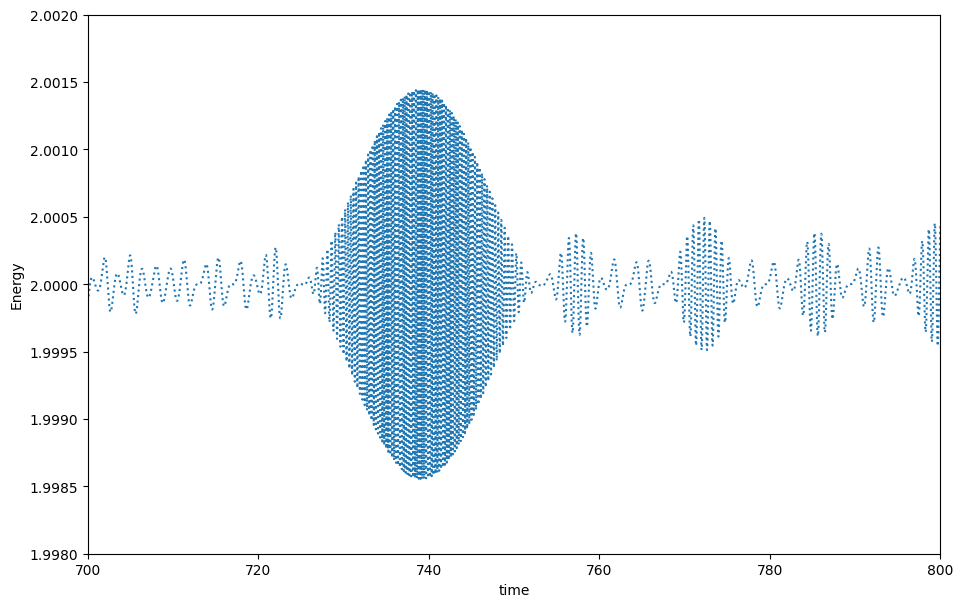

In [ ]:
#Trotter Energy graph

plt.figure(figsize=(11,7))
plt.plot(time,E,":")
plt.xlim(700,800)
plt.ylim(1.998,2.002)
plt.xlabel(r'time')
plt.ylabel(r'Energy')
plt.show()

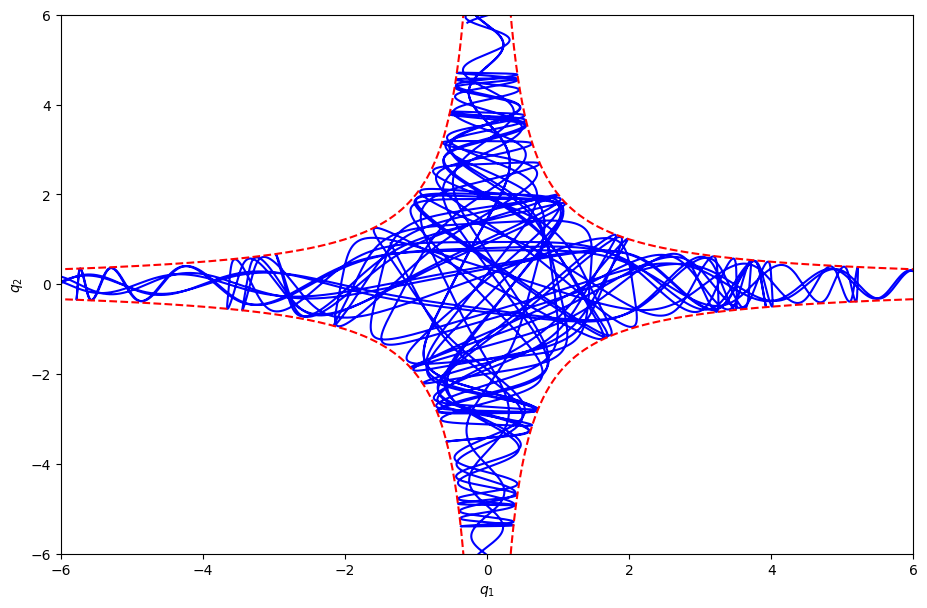

In [ ]:
#Phase diagram graph

x1 = np.linspace(-10, -0.1, 1000)
x2 = np.linspace(0.1, 10, 1000)
x3 = np.linspace(-10, -0.1, 1000)
x4 = np.linspace(0.1, 10, 1000)

y1 = [2/i for i in x1]
y2 = [2/i for i in x2]
y3 = [-2/i for i in x3]
y4 = [-2/i for i in x4]

plt.figure(figsize=(11,7))
plt.plot(q1[5000000:9000000],q2[5000000:9000000],'b',x1,y1,'r--',x2,y2,'r--',x3,y3,'r--',x4,y4,'r--')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel(r'$q_1$')
plt.ylabel(r'$q_2$')
plt.show()

In [ ]:
#Parameters definition
t=1000
n=10000000
dt=t/n
time= np.linspace(0,t,n)

#vectors and initial conditions
q1=[0]*n
q1[0]=2

q2=[0]*n
q2[0]=1

p1=[0]*n
p1[0]=0

p2=[0]*n
p2[0]=0

V=[0]*n
K=[0]*n

dV1=[0]*n
dV2=[0]*n
dK1=[0]*n
dK2=[0]*n

E=[0]*n

In [ ]:
#Perturbational approximant

for i in range(2000000):

  K[i]=0.5*(p1[i]**2+p2[i]**2)
  V[i]=0.5*q1[i]**2*q2[i]**2

  E[i]=K[i]+V[i]

  dV1[i]=q1[i]*q2[i]**2
  p1[i+1]=p1[i]-dt*dV1[i]
  dK1[i]=p1[i]
  q1[i+1]=q1[i]+dt*dK1[i]

  dV2[i]=q1[i]**2*q2[i]
  p2[i+1]=p2[i]-dt*dV2[i]
  dK2[i]=p2[i]
  q2[i+1]=q2[i]+dt*dK2[i]



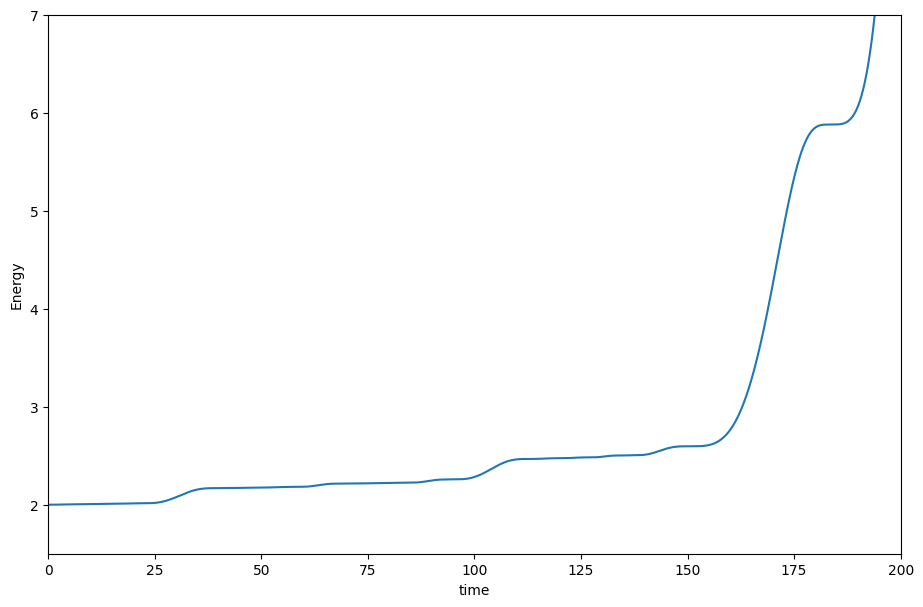

In [ ]:
#Perturbational energy graph

plt.figure(figsize=(11,7))
plt.plot(time,E)
plt.xlim(0,200)
plt.ylim(1.5,7)
plt.xlabel(r'time')
plt.ylabel(r'Energy')
plt.show()